In [51]:
%matplotlib inline

In [52]:
from matplotlib import pyplot as plt
import numpy as np


In [53]:
#For minor adn major ticks
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


In [54]:
#Read in data from XFOIL
data=np.loadtxt('./my_outputs/63415_v1.dat', skiprows=12)


In [55]:
#Read in data from XFOIL
airfoil=np.loadtxt('./my_airfoils/63415v1.dat', skiprows=1)


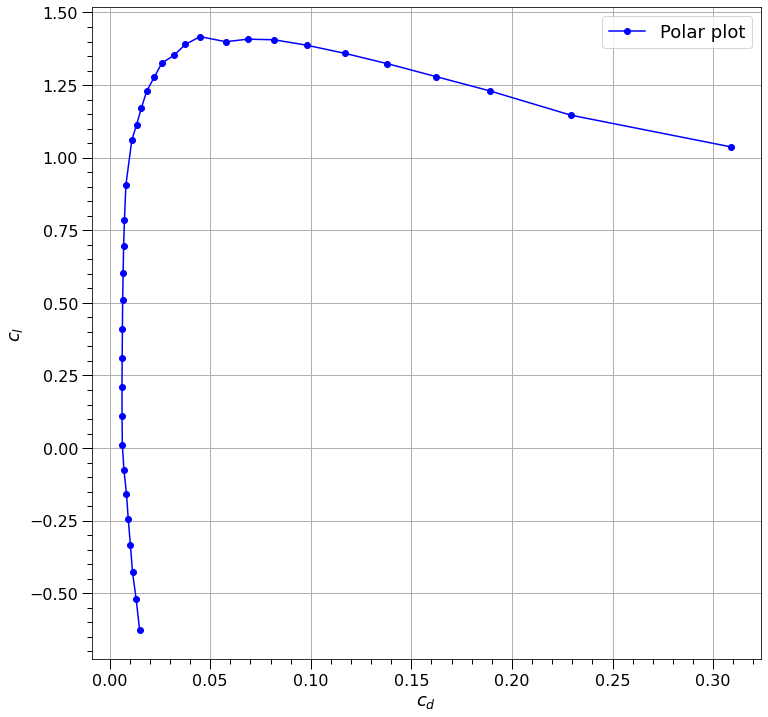

In [70]:
#Plot coefficients - Single curves

fig = plt.figure()
fig.set_size_inches(12,12)
ax = fig.add_subplot()



#Select dataset to plot
#plt.plot(data[:,0],data[:,1],'-o',label='Lift coefficient $c_l$', color='blue')
#plt.plot(data[:,0],data[:,2],'-o',label='Drag coefficient $c_d$', color='blue')
#plt.plot(data[:,0],data[:,4],'-o',label='Moment coefficient $c_m$', color='blue')
plt.plot(data[:,2],data[:,1],'-o',label='Polar plot', color='blue')

    
    
#Set axes label
#plt.xlabel('AOA ($^\circ$)', fontsize=18)
plt.xlabel('$c_d$', fontsize=18)
plt.ylabel('$c_l$', fontsize=18)
#plt.ylabel('$c_d$', fontsize=18)
#plt.ylabel('$c_m$', fontsize=18)



#Set ticks fontsize
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)



#Set axes limits
#plt.xlim([-15, 30])
#plt.ylim([-1, 2])



#Plot grid
plt.grid(True, lw=1, zorder=0)

#Plot legend
plt.legend(loc=0, fontsize=18)



#For minor and major ticks

#Axes ticks format
tkw = dict(size=10, width=1, labelsize=16)
#ax.tick_params(axis='y', **tkw)
ax.tick_params(axis='both', **tkw)

# For the minor ticks
#ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='minor', size=5, width=1)



#Save figure
#plt.savefig('fig.png', dpi=300)



plt.show()


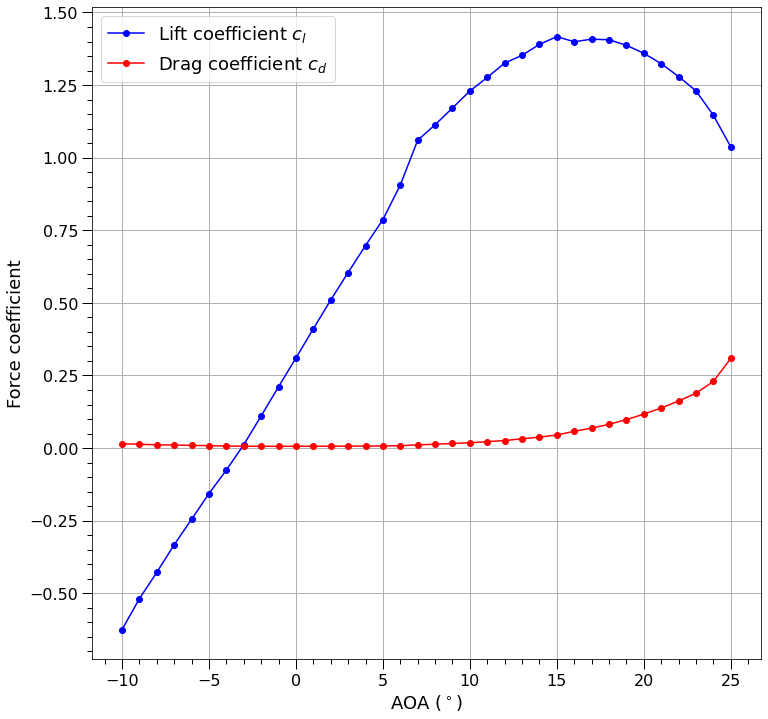

In [57]:
#Plot coefficients - Single curves

fig = plt.figure()
fig.set_size_inches(12,12)
ax = fig.add_subplot()



#Select dataset to plot
plt.plot(data[:,0],data[:,1],'-o',label='Lift coefficient $c_l$', color='blue')
plt.plot(data[:,0],data[:,2],'-o',label='Drag coefficient $c_d$', color='red')

    
    
#Set axes label
plt.xlabel('AOA ($^\circ$)', fontsize=18)
plt.ylabel('Force coefficient', fontsize=18)



#Set ticks fontsize
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)



#Set axes limits
#plt.xlim([-15, 30])
#plt.ylim([-1, 2])



#Plot grid
plt.grid(True, lw=1, zorder=0)

#Plot legend
plt.legend(loc=0, fontsize=18)



#For minor and major ticks

#Axes ticks format
tkw = dict(size=10, width=1, labelsize=16)
#ax.tick_params(axis='y', **tkw)
ax.tick_params(axis='both', **tkw)

# For the minor ticks
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='minor', size=5, width=1)



#Save figure
#plt.savefig('fig.png', dpi=300)



plt.show()


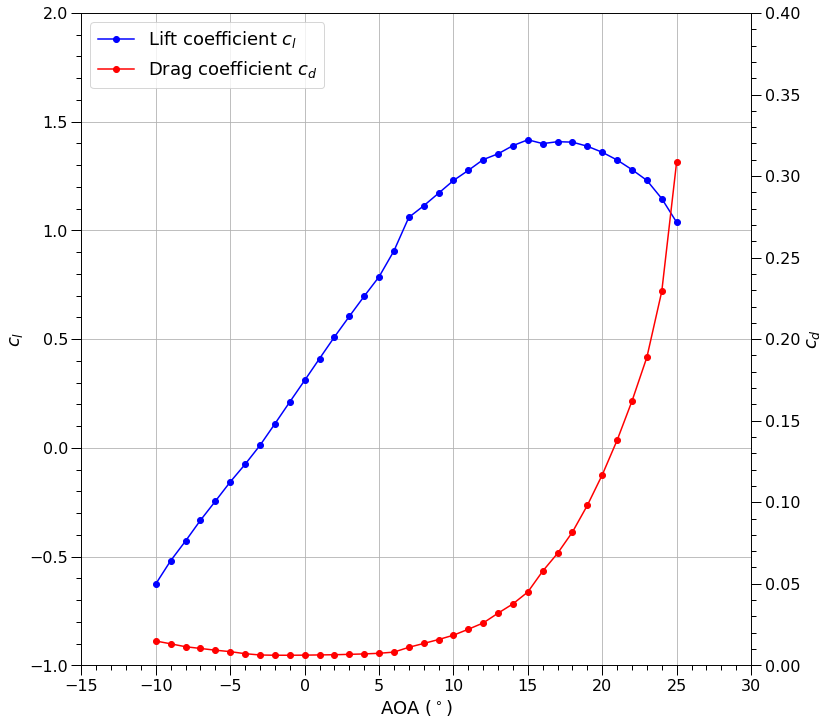

In [58]:
#Plot coefficients - Single curves

fig = plt.figure()
fig.set_size_inches(12,12)
ax1 = fig.add_subplot()



#Plot in vertical axis 1 (left)
plt.plot(data[:,0],data[:,1],'-o',label='Lift coefficient $c_l$', color='blue',zorder=101)

#Plot in vertical axis 2 (right)
ax2=ax1.twinx()
ax2.plot(data[:,0],data[:,2],'-o',label='Drag coefficient $c_d$', color='red',zorder=102)

    
    
#Set axes label
ax1.set_xlabel('AOA ($^\circ$)', fontsize=18)
ax1.set_ylabel('$c_l$', fontsize=18)
ax2.set_ylabel('$c_d$', fontsize=18)



#Set tick size
#plt.xticks(fontsize=16)
#plt.yticks(fontsize=16)



#Set axes limits
ax1.set_xlim([-15, 30])
ax1.set_ylim([-1, 2])
ax2.set_ylim([0, 0.4])



#Plot grid
ax1.grid(zorder=0)



#Plot legend
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=2, fontsize=18)



#Fontsize per axes
ax1.tick_params(axis ='x',labelsize=16)
ax1.tick_params(axis ='y',labelsize=16)
ax2.tick_params(axis ='y',labelsize=16)



#For minor and major ticks

#Major axis
ax1.tick_params(axis='both', size=10, width=1, labelsize=16)
ax2.tick_params(axis='y', size=10, width=1, labelsize=16)

#Minor axis
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which='minor', size=5, width=1)
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which='minor', size=5, width=1)



#Save figure
#plt.savefig('fig.png', dpi=300)



plt.show()


In [59]:
#Some array manipulation to extract values

In [60]:
#Get maximum value of cd
max(data[:,1])


1.4168

In [61]:
#Find index where the value is equal to zero. AOA = 0
x=np.argwhere(data[:,0] == 0)

#USe the index to pirnt the value at the index location. CL at indet location x
data[x,1][0,0]


0.3103

In [62]:
#Create interpoltion functions using scipy
from scipy import interpolate

#Interpolation function 1 x-y.
fint1 = interpolate.interp1d(data[:,0],data[:,1],kind='linear')

#Interpolation function 1 y-x. Used to find AOA at cl 0
fint2 = interpolate.interp1d(data[:,1],data[:,0],kind='linear')


In [63]:
#Interpolation array x
xnew=np.linspace(-10,25,10000)
#xnew=np.arange(-10,25,0.1)


In [64]:
#Interpolation array y. Computed using fint
ynew = fint1(xnew)


In [65]:
#Use interpolated function to find AOA at cl=0
fint2(0)

array(-3.13318025)

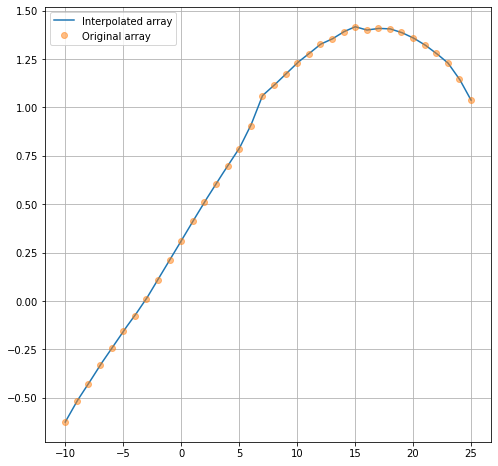

In [66]:
#Comparison of original array and interpolatied array
fig = plt.figure()
fig.set_size_inches(8,8)

plt.plot(xnew,ynew,label="Interpolated array")
plt.plot(data[:,0],data[:,1],'o',label="Original array",alpha=0.5)

plt.grid()
plt.legend()


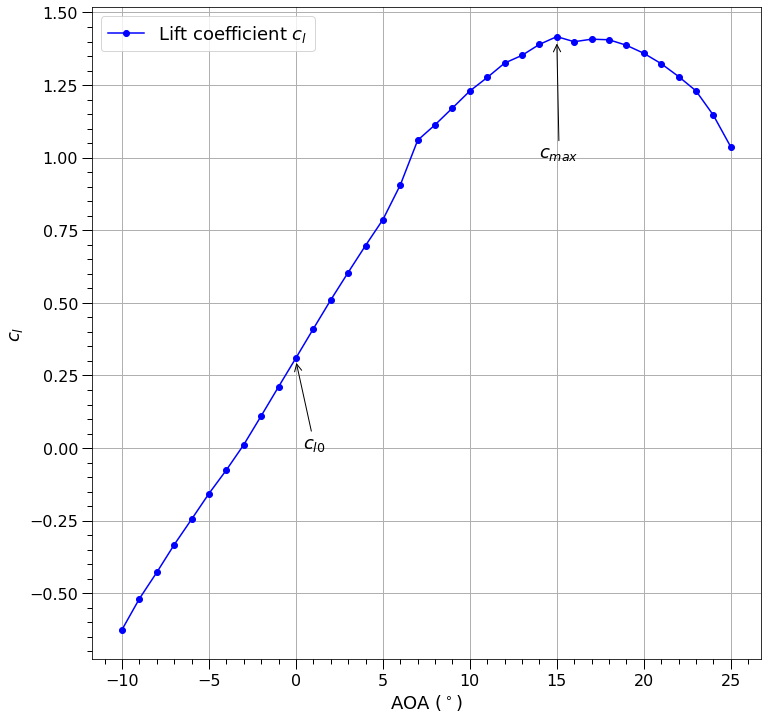

In [67]:
#Plot coefficients - Single curves

fig = plt.figure()
fig.set_size_inches(12,12)
ax = fig.add_subplot()



#Select dataset to plot
plt.plot(data[:,0],data[:,1],'-o',label='Lift coefficient $c_l$', color='blue')


    
#Set axes label
plt.xlabel('AOA ($^\circ$)', fontsize=18)
plt.ylabel('$c_l$', fontsize=18)



#Set ticks fontsize
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)



#Set axes limits
#plt.xlim([-15, 30])
#plt.ylim([-1, 2])



#Plot grid
plt.grid(True, lw=1, zorder=0)

#Plot legend
plt.legend(loc=0, fontsize=18)



#For minor and major ticks

#Axes ticks format
tkw = dict(size=10, width=1, labelsize=16)
#ax.tick_params(axis='y', **tkw)
ax.tick_params(axis='both', **tkw)

# For the minor ticks
#ax.xaxis.set_minor_locator(MultipleLocator(1))
#ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='minor', size=5, width=1)



#Add annotation
plt.annotate('$c_{l0}$',
            xy=(0,0.30), arrowprops=dict(arrowstyle='->'), xytext=(0.4, 0),fontsize=18)

plt.annotate('$c_{max}$',
            xy=(15,1.40), arrowprops=dict(arrowstyle='->'), xytext=(14, 1),fontsize=18)


#Save figure
#plt.savefig('fig.png', dpi=300)



plt.show()


In [68]:
#Matplotlib numpy version
import matplotlib, numpy, scipy
print(matplotlib.__version__)
print(numpy.__version__)
print(scipy.__version__)

3.3.4
1.20.1
1.6.2
